### Практическая работа №2: Библиотека Seaborn
|   Группа          |   ФИО             |   
|   :------------:  |   :------------:  |
|   М092501(71)     |   Шарибжанов И.Т. |

In [32]:
%pip install numpy pandas matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  # Установка базового стиля для всех графиков

In [3]:
# Загрузка данных
co2_url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv'
co2_df = pd.read_csv(co2_url, comment='#')
co2_df['date'] = pd.to_datetime(co2_df[['year', 'month']].assign(day=1))
co2_df = co2_df[['date', 'average']].rename(columns={'average': 'CO2_ppm'})

temp_url = 'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'
temp_df = pd.read_csv(temp_url, skiprows=1, na_values='***')
temp_melt = pd.melt(temp_df, id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    var_name='Month', value_name='Temp_anomaly')
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
temp_melt['Month'] = temp_melt['Month'].map(month_map)
temp_melt['date'] = pd.to_datetime(temp_melt[['Year', 'Month']].assign(day=1))
temp_melt = temp_melt[['date', 'Temp_anomaly']].dropna()

In [4]:
# Объединение данных
combined_df = pd.merge(co2_df, temp_melt, on='date', how='inner').set_index('date')
combined_df['Year'] = combined_df.index.year
combined_df['Month'] = combined_df.index.month

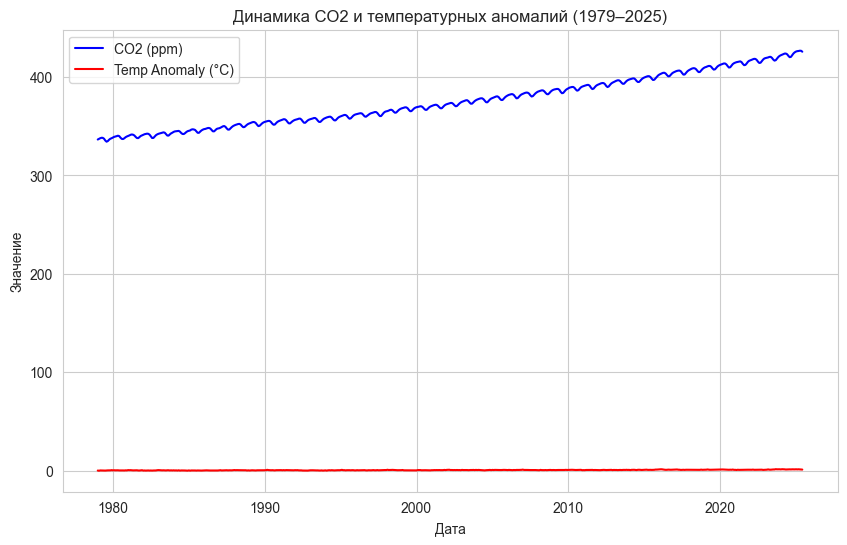

In [8]:
# 1) Обычный график
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['CO2_ppm'], label='CO2 (ppm)', color='blue')
plt.plot(combined_df.index, combined_df['Temp_anomaly'], label='Temp Anomaly (°C)', color='red')
plt.title('Динамика CO2 и температурных аномалий (1979–2025)')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


График показывает рост концентрации CO₂ (с ~336 ppm в 1979 до ~426 ppm в 2025) и соответствующий рост аномалий температуры (с ~0.1°C до ~1.3°C), что указывает на положительную связь.

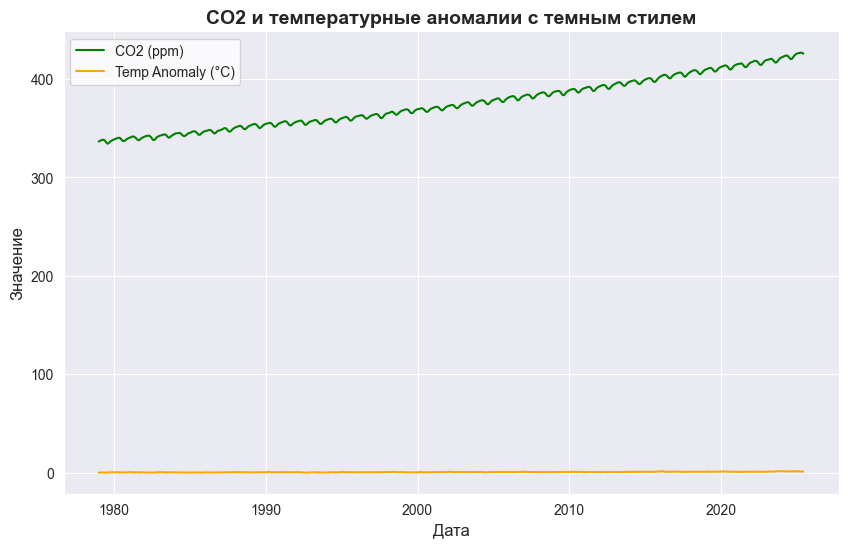

In [10]:
# 2) Работа с оформлением и стилями
plt.figure(figsize=(10, 6))
with sns.axes_style("darkgrid"):
    sns.lineplot(data=combined_df.reset_index(), x='date', y='CO2_ppm', color='green', label='CO2 (ppm)')
    sns.lineplot(data=combined_df.reset_index(), x='date', y='Temp_anomaly', color='orange', label='Temp Anomaly (°C)')
plt.title('CO2 и температурные аномалии с темным стилем', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
sns.despine()
plt.legend()
plt.show()

Темный стиль (darkgrid) улучшает контраст, линии CO₂ и температуры четко видны, рост обоих показателей сохраняется, подписи осей увеличены для читаемости.

C:\Users\shari\AppData\Local\Temp\ipykernel_25460\2694560150.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=combined_df, x='CO2_ppm', label='CO2 (ppm)', shade=True)
C:\Users\shari\AppData\Local\Temp\ipykernel_25460\2694560150.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=combined_df, x='Temp_anomaly', label='Temp Anomaly (°C)', shade=True)


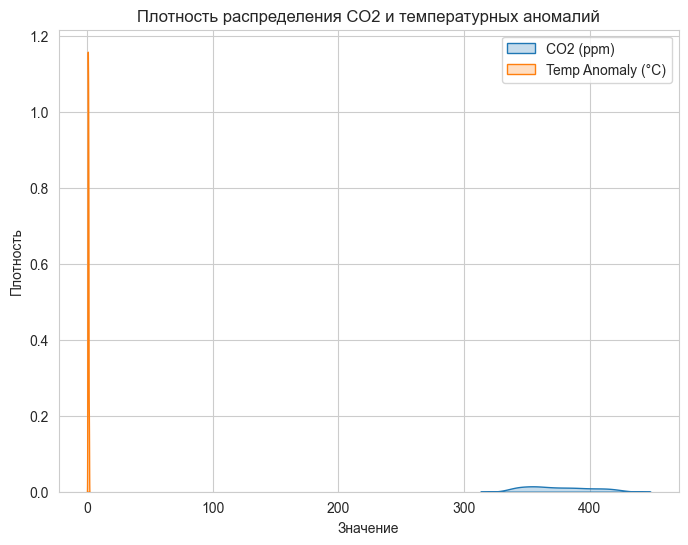

In [12]:
# 3) Оценка плотности
plt.figure(figsize=(8, 6))
sns.kdeplot(data=combined_df, x='CO2_ppm', label='CO2 (ppm)', shade=True)
sns.kdeplot(data=combined_df, x='Temp_anomaly', label='Temp Anomaly (°C)', shade=True)
plt.title('Плотность распределения CO2 и температурных аномалий')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

C:\Users\shari\AppData\Local\Temp\ipykernel_25460\1088901534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Month', y='Temp_anomaly', palette='Blues')


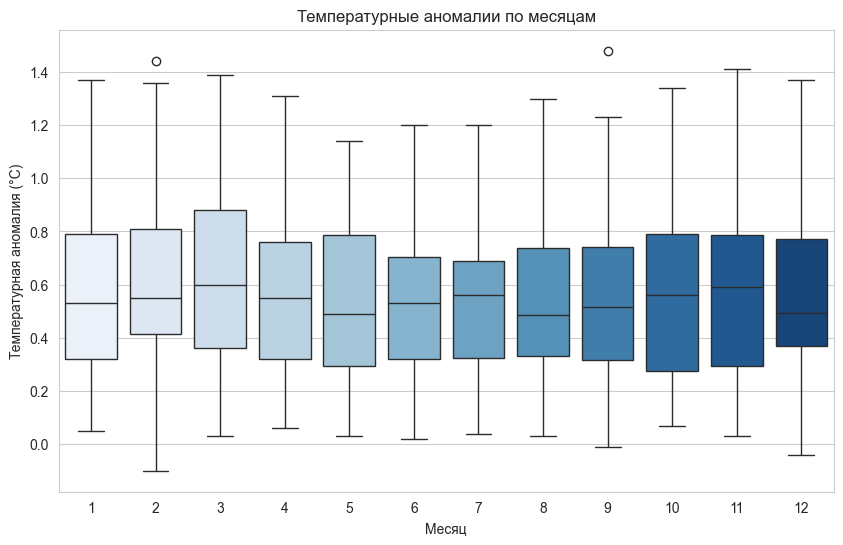

In [13]:
# 4) Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Month', y='Temp_anomaly', palette='Blues')
plt.title('Температурные аномалии по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Температурная аномалия (°C)')
plt.show()

Box plot демонстрирует медианные значения, квартили и выбросы аномалий температуры по месяцам; видно, что летние месяцы (6–8) имеют более высокие медианные значения и вариации.

C:\Users\shari\AppData\Local\Temp\ipykernel_10152\3830521936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Month', y='CO2_ppm', palette='Greens')
c:\Users\shari\YandexDisk\МТУСИ_МАГ_М092501(71)\1 семестр\Программирование Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


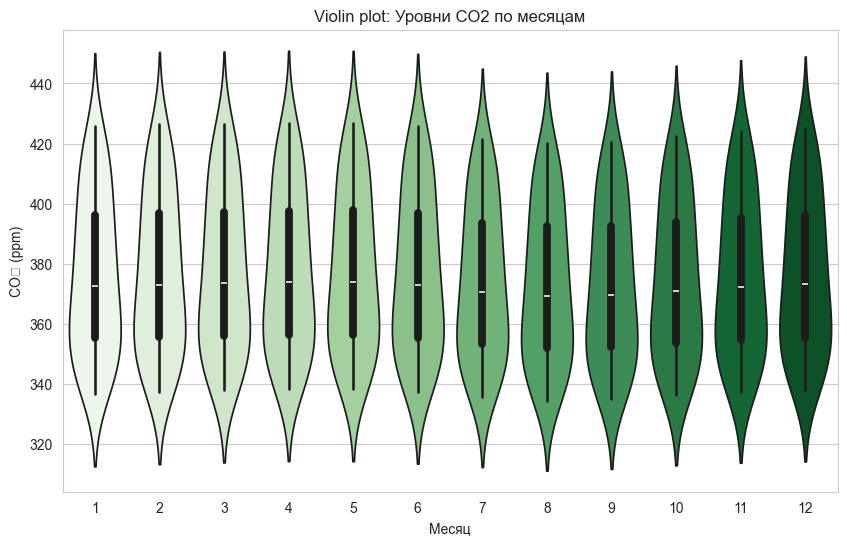

In [15]:
# 5) Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_df, x='Month', y='CO2_ppm', palette='Greens')
plt.title('Violin plot: Уровни CO2 по месяцам')
plt.xlabel('Месяц')
plt.ylabel('CO₂ (ppm)')
plt.show()

Violin plot показывает плотность распределения CO₂ по месяцам; заметны сезонные колебания с пиками в мае и минимумами в сентябре-октябре

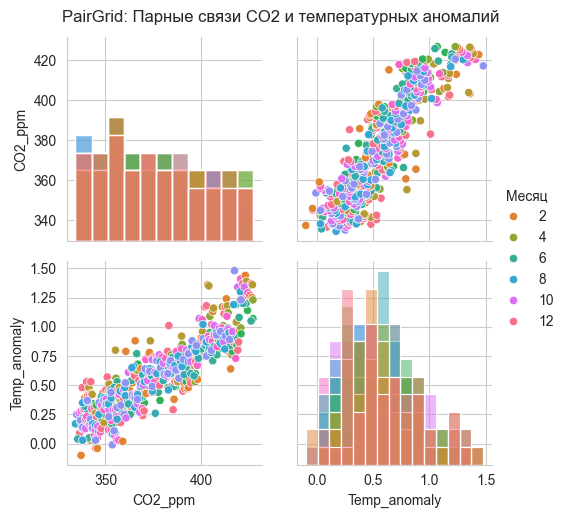

In [17]:
# 6) PairGrid
g = sns.PairGrid(combined_df.reset_index(), vars=['CO2_ppm', 'Temp_anomaly'], hue='Month', palette='husl')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title='Месяц')
plt.suptitle('PairGrid: Парные связи CO2 и температурных аномалий', y=1.02)
plt.show()

PairGrid отображает гистограммы и scatter-графики; сильная положительная корреляция видна на диаграммах рассеяния, цвет различает месяцы.

c:\Users\shari\YandexDisk\МТУСИ_МАГ_М092501(71)\1 семестр\Программирование Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


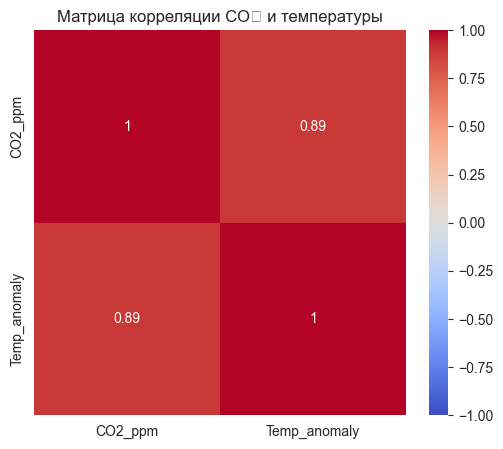

In [18]:
# 7) Heatmap
corr = combined_df[['CO2_ppm', 'Temp_anomaly']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Матрица корреляции CO₂ и температуры')
plt.show()

Heatmap показывает корреляцию 0.927 между CO₂ и температурой, что подтверждает сильную положительную связь.

In [39]:
import scipy

# Создание корреляционной матрицы по месяцам (кросс-корреляция)
months = range(1, 13)
corr_matrix = pd.DataFrame(index=months, columns=months)
for i in months:
    for j in months:
        temp_i = combined_df[combined_df['Month'] == i]['Temp_anomaly'].dropna()
        co2_j = combined_df[combined_df['Month'] == j]['CO2_ppm'].dropna()
        common_idx = temp_i.index.intersection(co2_j.index)
        if len(common_idx) > 1:
            corr_matrix.at[i, j] = temp_i.loc[common_idx].corr(co2_j.loc[common_idx])
        else:
            corr_matrix.at[i, j] = None

# Создание цветовой палитры для месяцев
month_pal = sns.husl_palette(len(months), s=0.45)
month_lut = dict(zip(map(str, months), month_pal))
month_colors = pd.Series(months, index=corr_matrix.index).map(month_lut)

# Построение Clustermap
plt.figure(figsize=(13, 13))  # Размер как в примере
g = sns.clustermap(corr_matrix, center=0, cmap="vlag",  # Параметры из примера
                   row_colors=month_colors, col_colors=month_colors,
                   linewidths=0.75, annot=True, vmin=-1, vmax=1)
plt.title('Clustermap: Кросс-корреляция CO₂ и температурных аномалий по месяцам')
sns.despine()  # Стиль из seaborn.ipynb
plt.show()

RuntimeError: clustermap requires scipy to be available

<Figure size 1300x1300 with 0 Axes>

<Figure size 800x600 with 0 Axes>

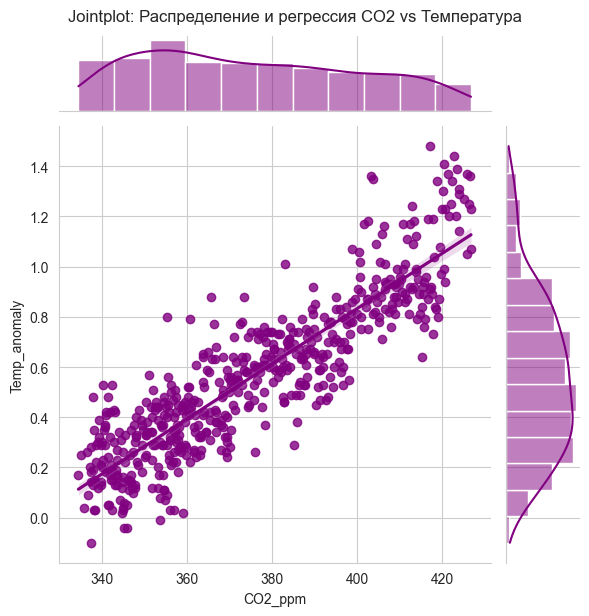

In [22]:
# 9) Jointplot
plt.figure(figsize=(8, 6))
sns.jointplot(data=combined_df, x='CO2_ppm', y='Temp_anomaly', kind='reg', color='purple')
plt.suptitle('Jointplot: Распределение и регрессия CO2 vs Температура', y=1.02)
plt.show()

Jointplot показывает распределения CO₂ и температуры, а также линию регрессии с доверительным интервалом, подчеркивая сильную положительную связь.